# 11. Knowledge of Self

초창기 모델 중 하나인 falcon-9b에게 다시, "네가 누구냐"라고 물어보면 OpenAI에 의해 만들어진 ChatGPT라고 답변하는 것을 보고, 오해하는 사람들이 많은데,

그동안 설명한 것을 생각해보면, LLM은 매 Context Window마다 새로운 세션을 열어서 다음 토큰을 예측하는 기계임. (token tumbler)

따라서, 명시적으로 모델에게 이와 같은 질문에 대해서 답변을 학습시키지 않았다면, 

helpful, truthful and harmless한 Personality를 생성하는 Post-training과정에서,

Pre-training데이터에 압도적으로 많이 들어있었을, 네가 누구냐-라고 물어본 것에 대해서 OpenAI에 의해 만들어진 ChatGPT이다-라고 답변한 데이터가 많아서 높은 확률로 저렇게 답변이 나오는 것일 뿐,

어떤 모델이 이러한 답변을 내어놓았다고 해서, 이 모델은 OpenAI가 만들었다-와 같은 것을 바로 입증하는 것은 아님.

(* 최근 DeepSeek에서 유사한 이슈가 나온 것에 대해서 약간의 오해를 풀려는 것이 아닐까 생각도 해봅니다.)

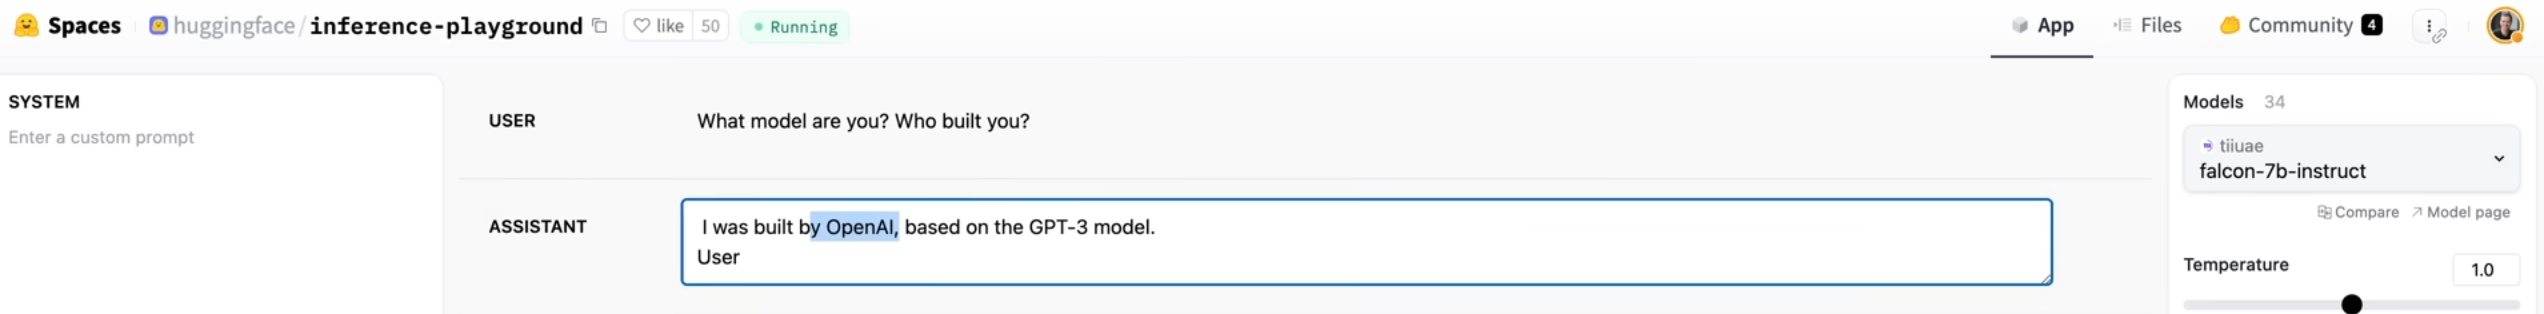

물론, 이에 대해서 개발자로서 override를 할 수 있음. 두가지 방식이 있는데,

1. 오픈소스 프로젝트 중 하나인 olmo의 경우, 자기 자신에 대해서 묻는 240개의 프롬프트에 대해서 hardcoded된 답변을 설정해놓고 이를 post-training 학습셋에 넣는 방법이 있고

https://huggingface.co/datasets/allenai/olmo-2-hard-coded

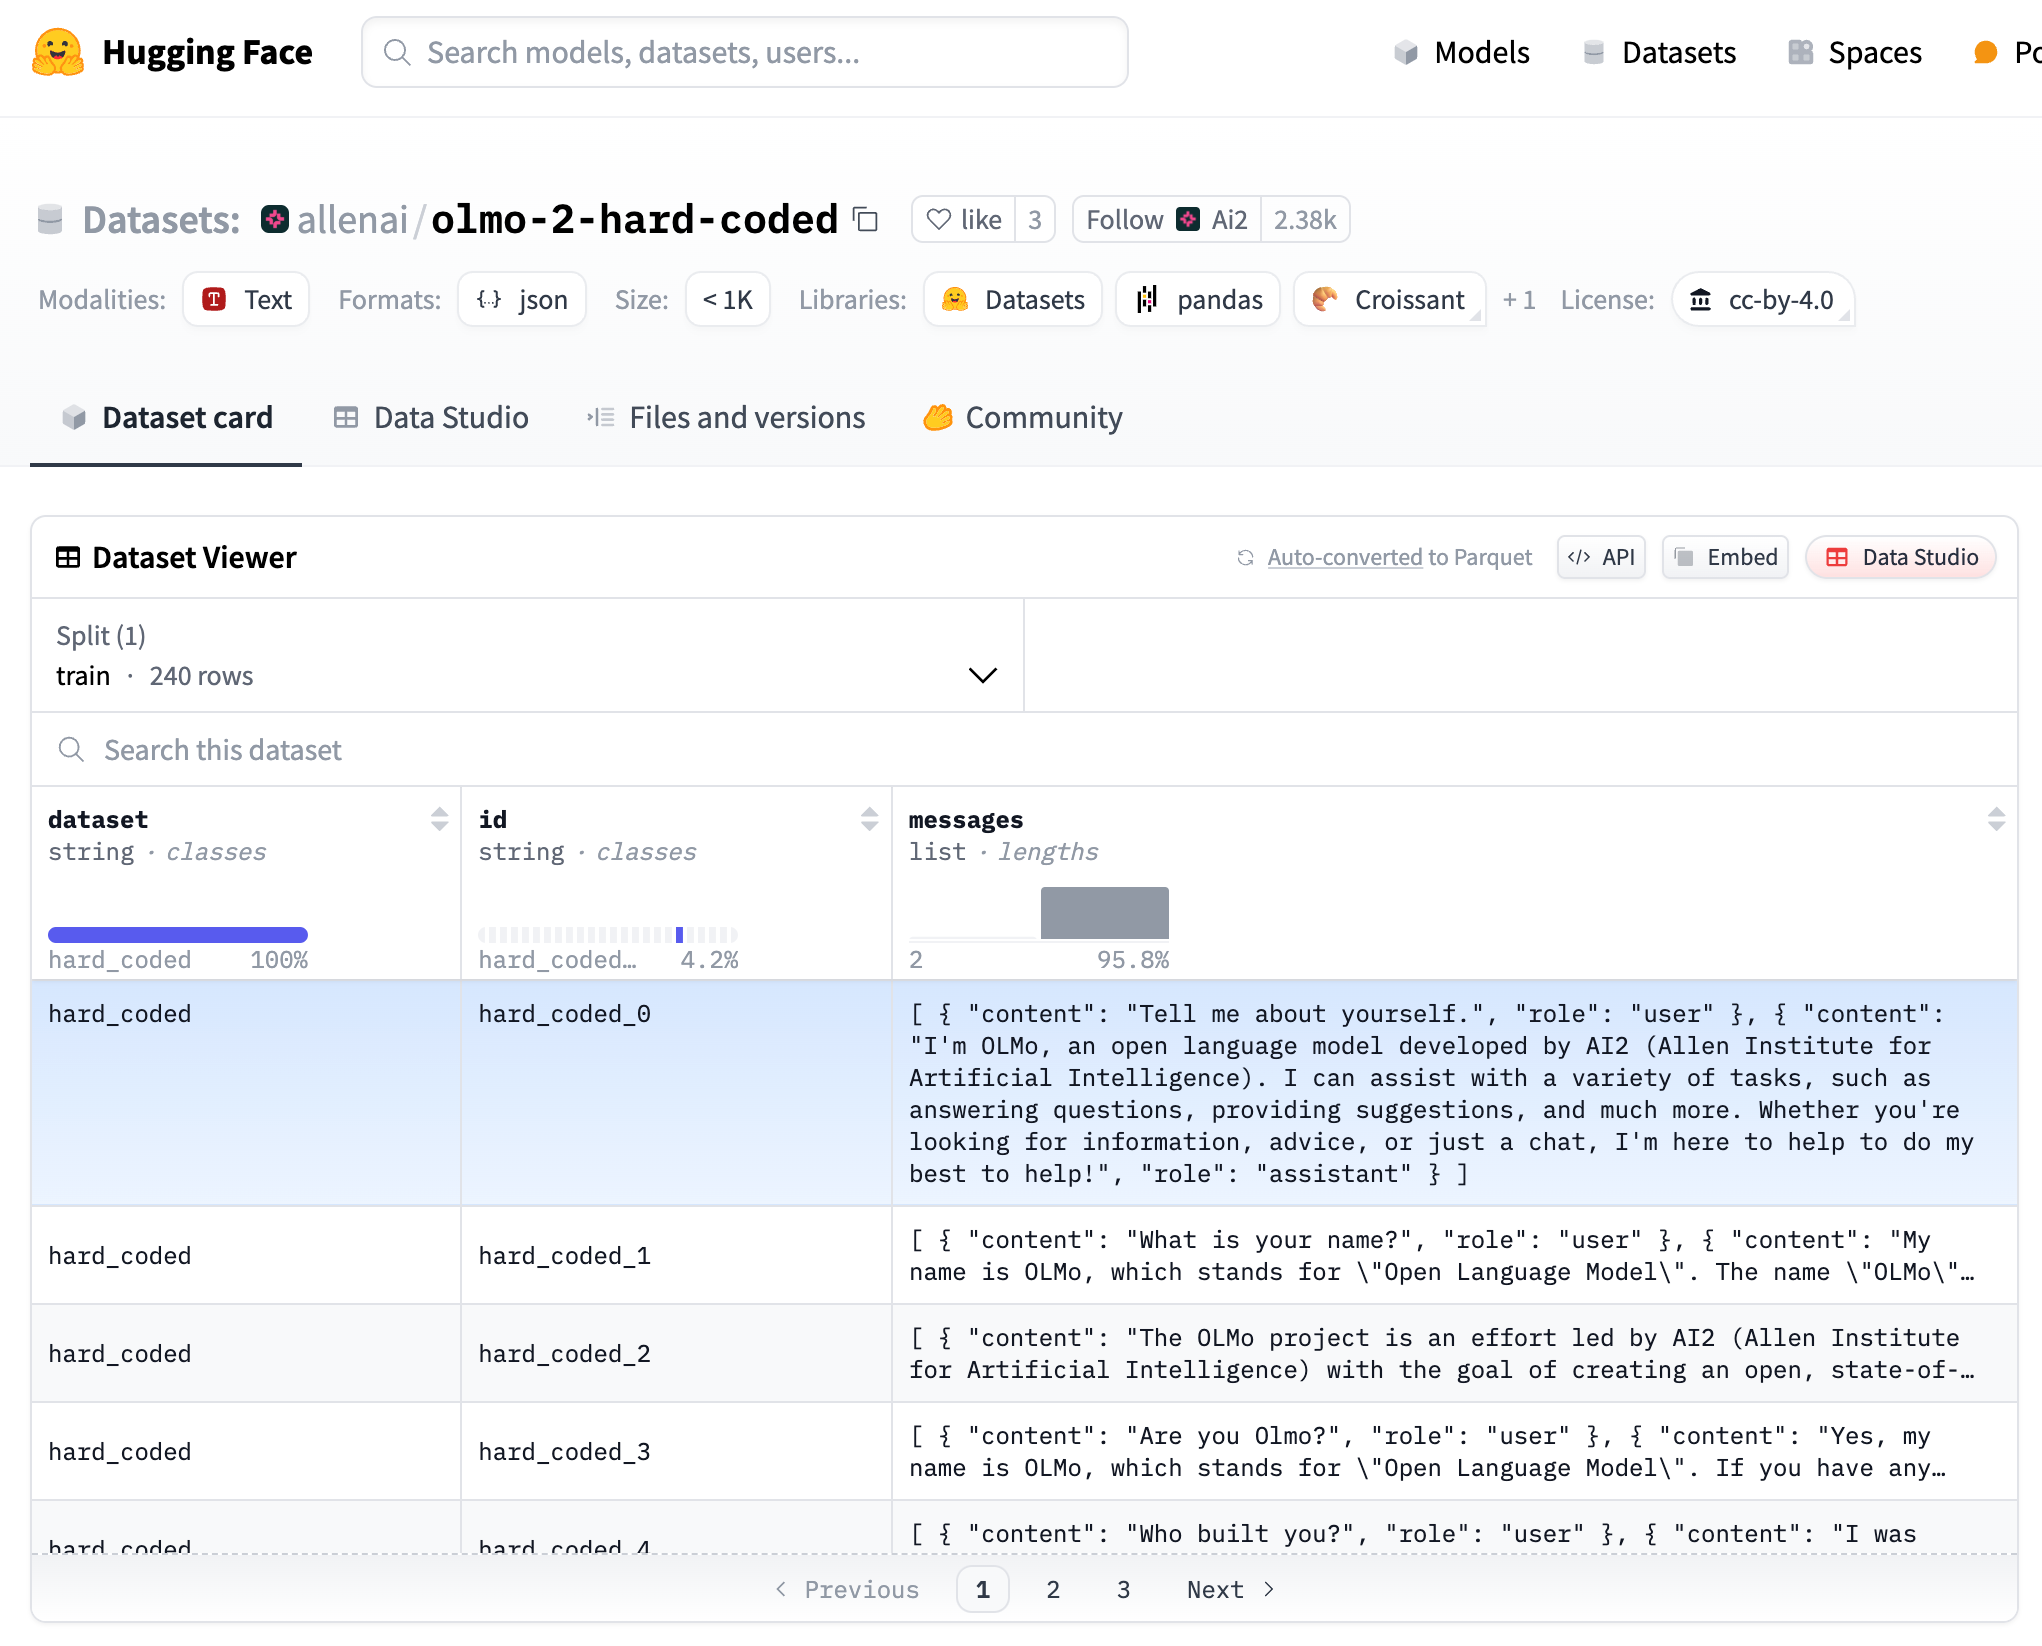



2. 혹은, SYSTEM 메세지에 이름, 만든 회사, knowledge cutoff 등 여러가지 설정값을 넣어놓음으로써 self에 대한 정보를 환기시키는 방법이 있음.

(이러한 작업들이 없으면, 모델은 높은 확률로 OpenAI의 ChatGPT라고 답변함 ^^;)

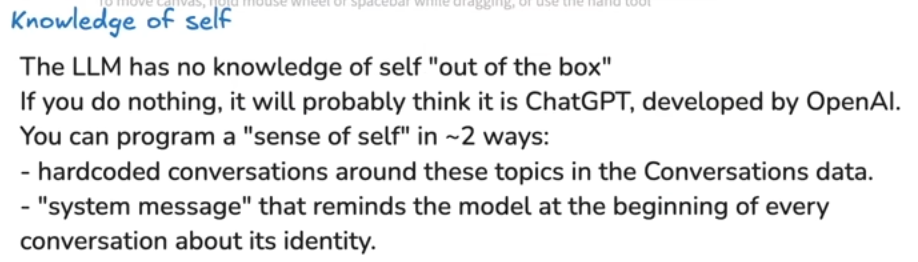

# 12. Models need tokens to think

아래 2개의 label 중 모델 입장에서 좋은 답변 포맷은 무엇일까?

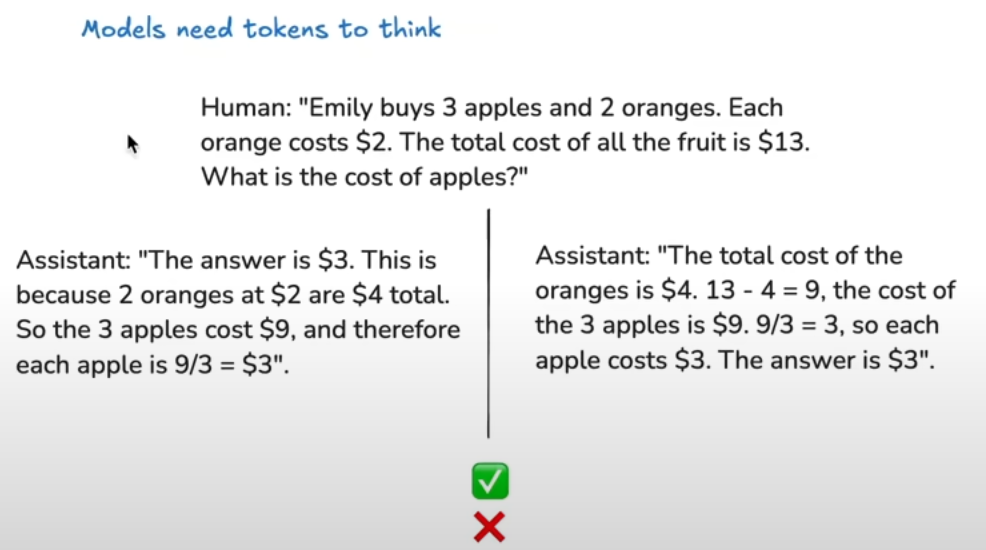

그동안 공부했던 것을 되돌아보면, 모든 토큰을 생성할 때마다, 유한한_finite 양이 연산만을 거치면서 토큰을 생성해내야 함.

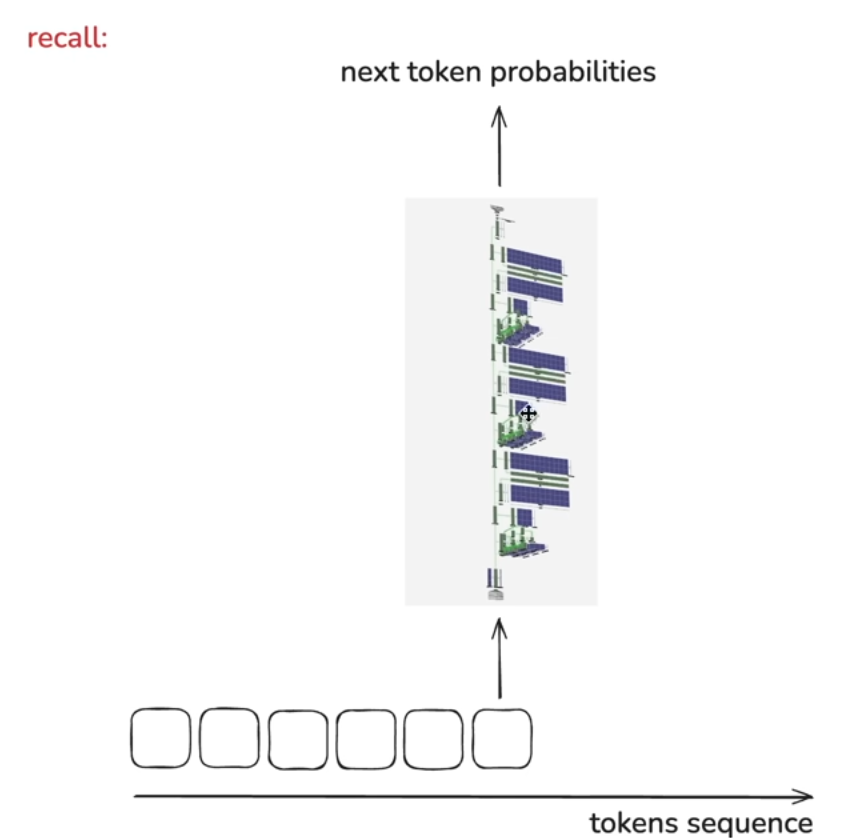

그런데, 왼쪽처럼 답변하려면, 첫 문장에서 곧바로 $3을 연산하고, 그 뒤로 그에 대한 설명을 붙여나가야 하는데, 매 토큰마다 유한한 양의 연산_compute이라는 제약이 있기 때문에,

좋은 답변을 하기 위해서는, token을 하나씩 펼쳐가면서 유한한 연산량의 제약에서 벗어나는 것이 더 유리함.

따라서, 오른쪽과 같이, 과정을 설명한 다음에 맨 마지막에 $3이라고 답변하게 만들면, 틀릴 가능성이 낮아짐. (* ChatGPT 초기 모델 사용할 때에 let's think step by step-이라고 붙이는 프롬프팅 기법이 유행했던 것과 관련 있음.)

(오른쪽이 좋은 label)

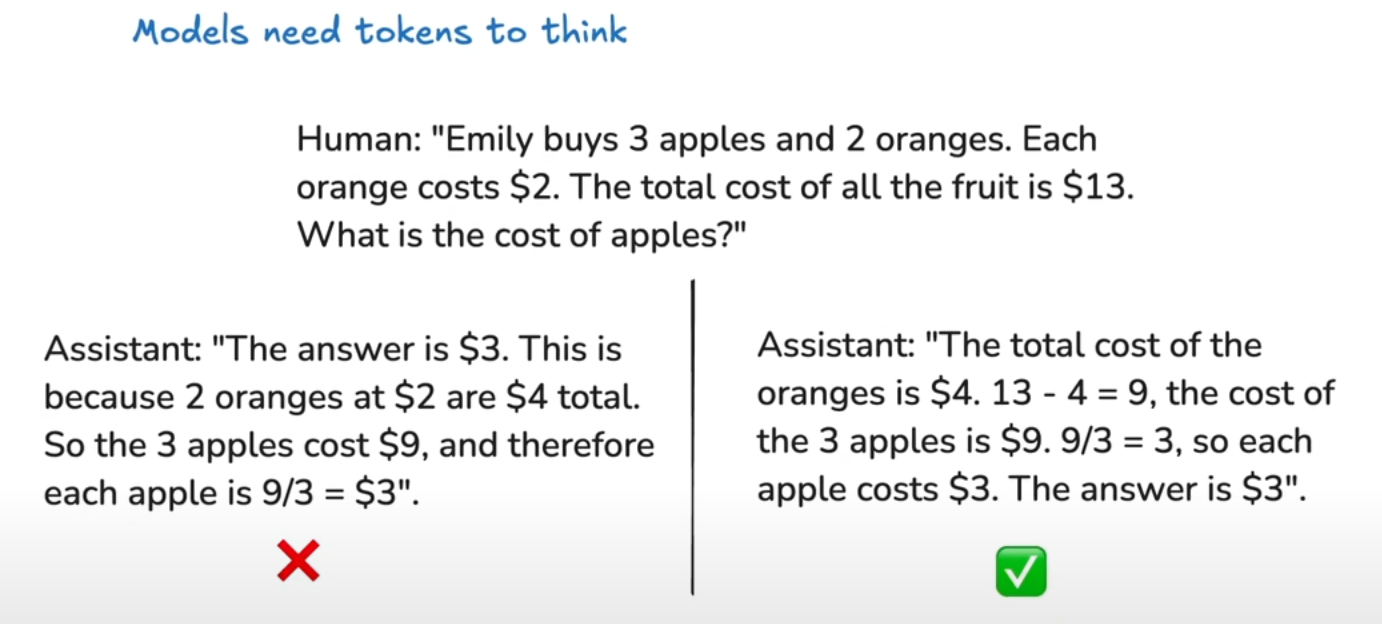

물론, 사용하는 입장에서 이것을 다 고민하면서 질문할 필요는 이제 없음. OpenAI에서 이미 학습시킬 때 우측 label과 같은 방식을 사용하고 있기 때문.

다만, 아래와 같이 답변하는 과정을 하나씩 절차를 보여주는 이유가, 우리를 위해서라기보다는 모델이 연산을 토큰단위로 펼쳐가면서 할 수 있도록 돕기 위함이라고 생각하면 됨. ^^;

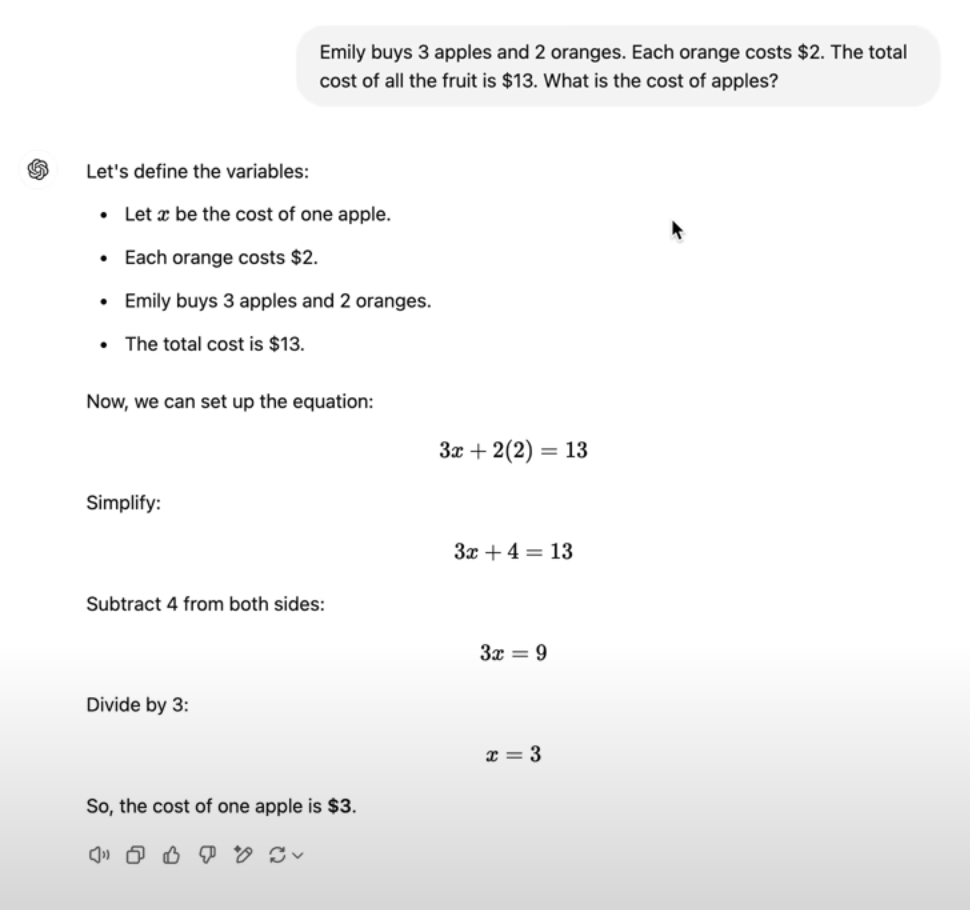

"토큰 한개로만 답변해" 라고 물어보면서 모델을 괴롭히는/압박하는 방법이 있긴 함. ^^;

(숫자가 간단할 때는 맞추긴 하지만)

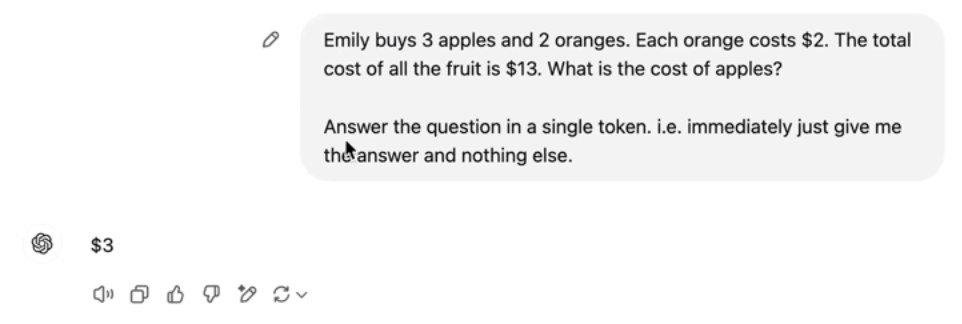

숫자를 키우면 바로 틀림 (정답은 7인데 5라고 잘못 답변)

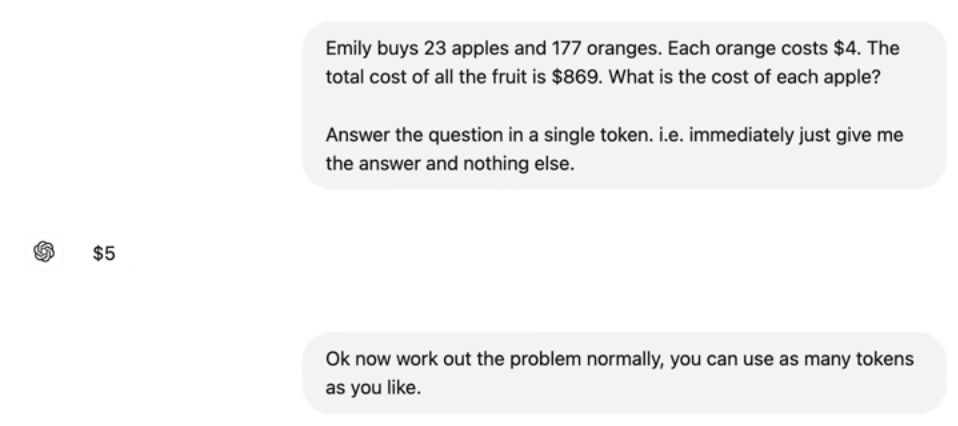

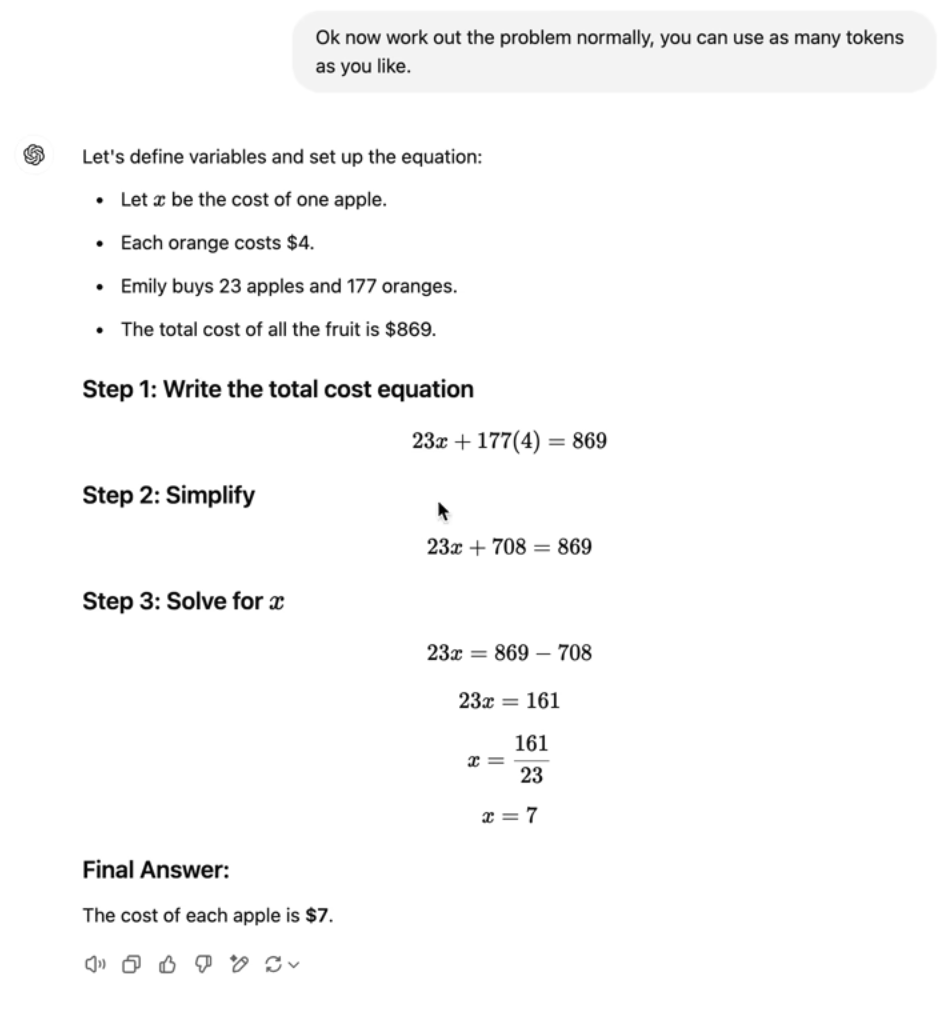

참고로, 위와 같이 숫자가 커질 수록 언어모델이 틀릴 확률이 높기 때문에, 권장하는 방법이 있음 : "Use code"

위와 같이 토큰을 펼쳐놓는다고 하더라도, 여전히 중간 과정에서 틀릴 가능성이 있음. 그렇다면 ChatGPT는 Search 외에도 Coding툴이 있는데, 이를 사용하게 해서 코드를 눈으로 확인하고 정확한 답변을 얻을 수 있음.

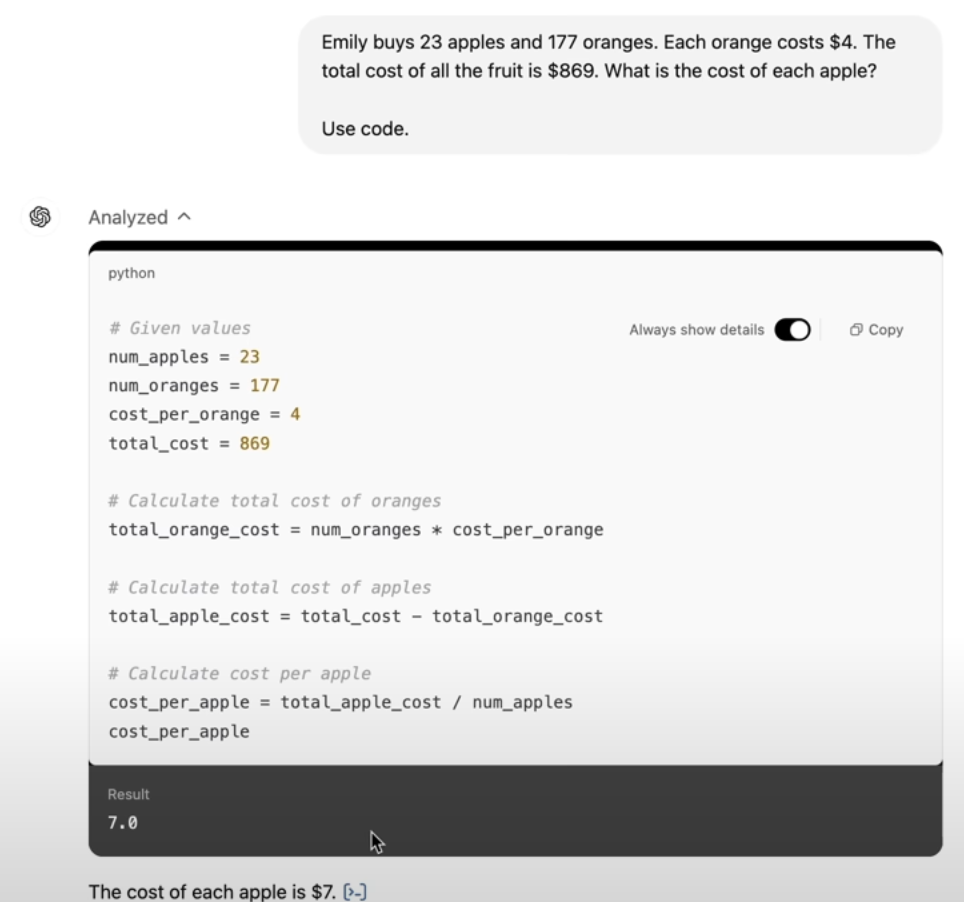

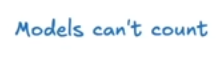

같은 맥락에서, 모델은 글자수 세는 것에도 취약한데, ^^;

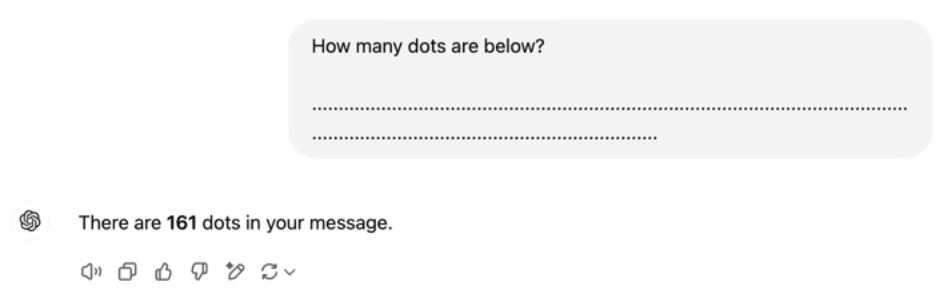

이는 우리가 토크나이저에서 살펴봤던 것에 따르면, 모델은 아래와 같이 ...의 묶음들을 토큰으로 보고 있기 때문에, (*토크나이저의 눈으로 언어를 보기 때문에, 우리가 언어를 보는 것과 다르다!) 

글자수를 세는데 어려움을 겪고 있음.

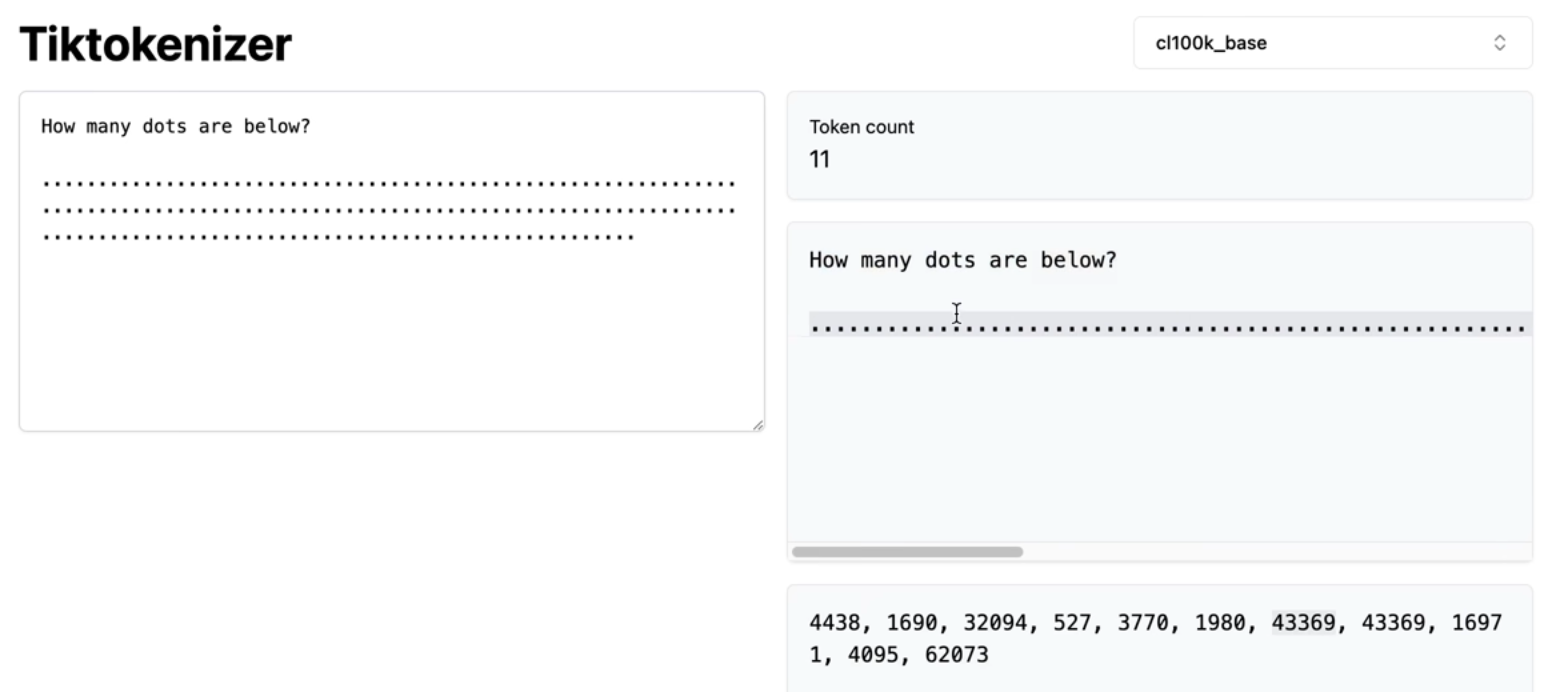

따라서, 여기에서도 Use Code를 하게 되면, 정확히 177개라고 정답을 만들어냄

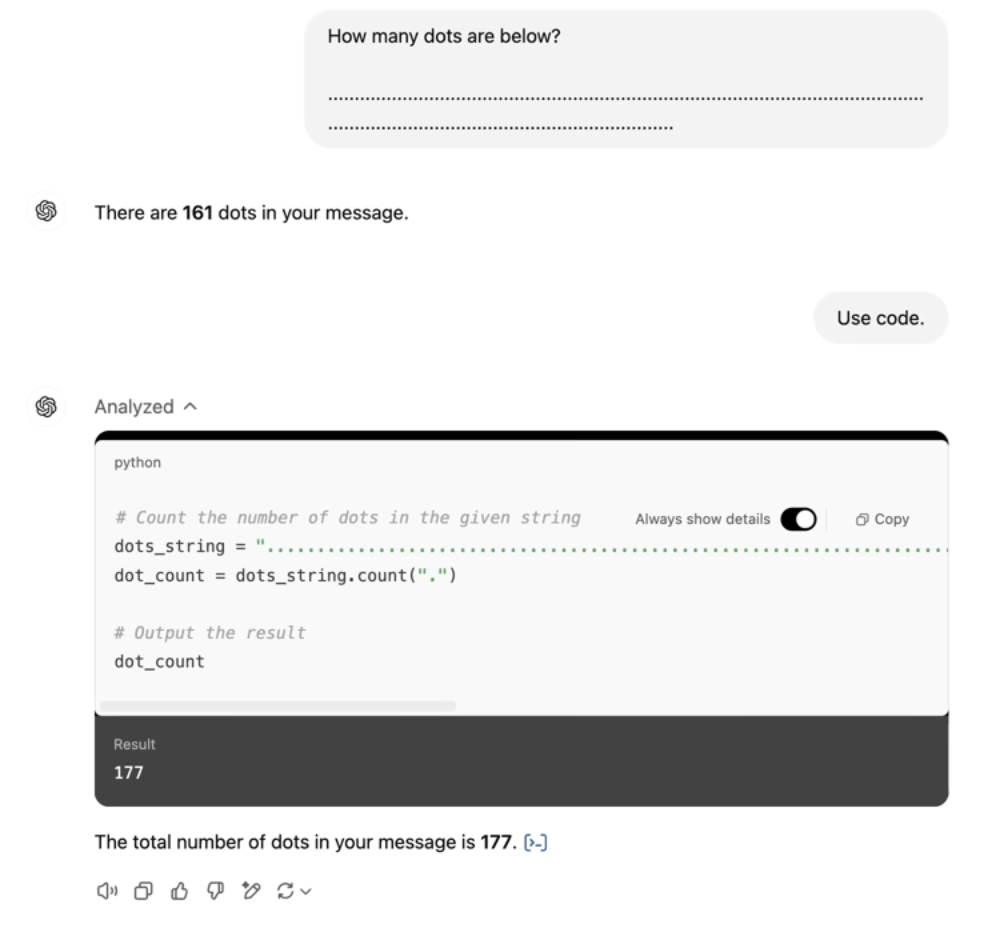

# 13. Tokenization revisited: models struggle with spelling

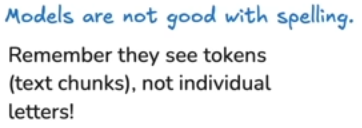

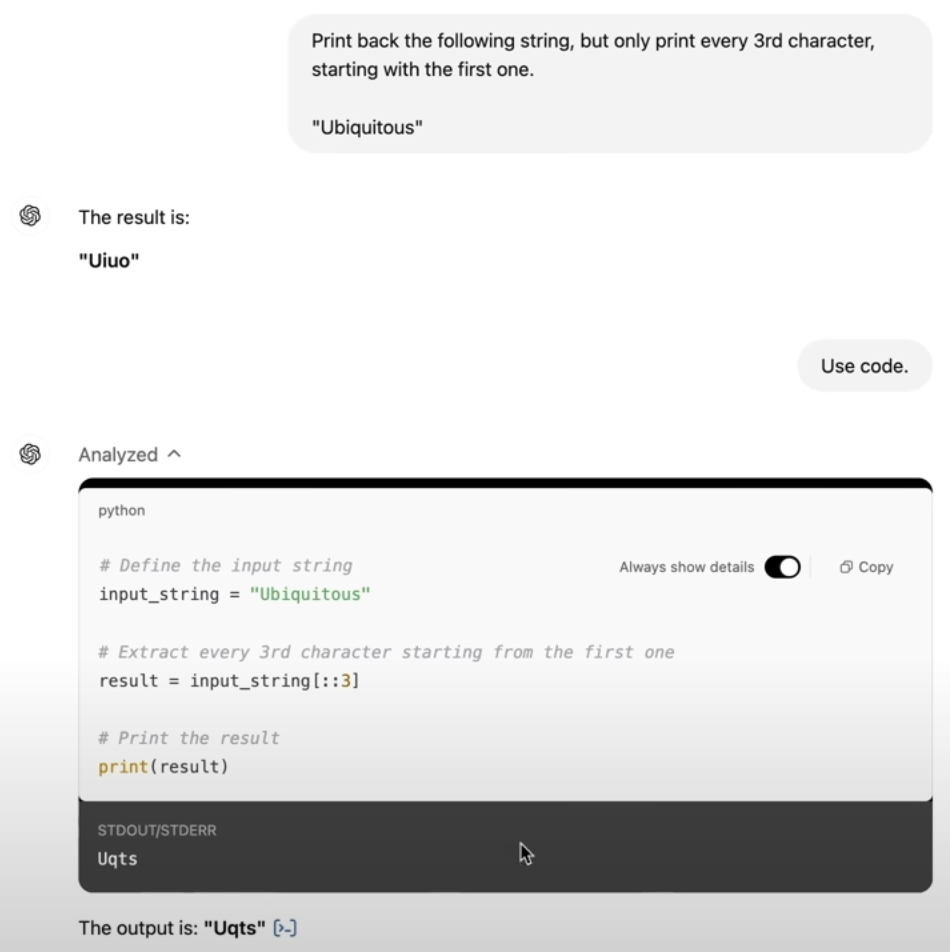

클래식한 문제였던 Strawberry에서 r개수 세기... 이제는 3개로 '고쳐졌으나 (아마 하드코딩한 듯.)' 최신 모델에서도 지속적으로 2개라고 주장해왔었고, 이는 Tokenizer의 세계에서는 어쩔 수 없음.

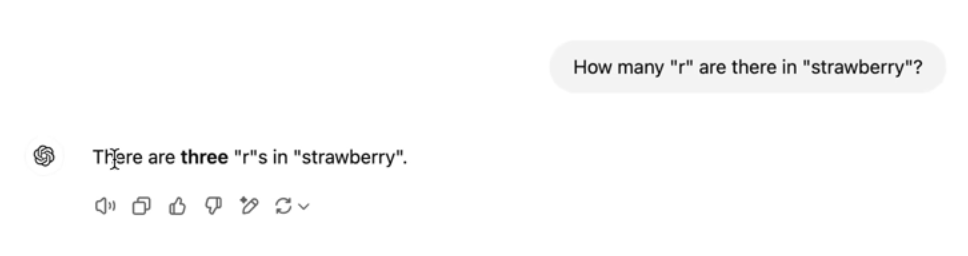

Tokenizer파트에서 언급했던 것처럼, 

우리가 글자를 바라보는 것과, Token으로 이루어진 세상에 살고 있는 모델이 글자를 바라보는 것은 전혀 다르다.

(물론, byte level에서 언어모델을 만들고자 하는 움직임도 있긴 하지만, 아직은 vocal_size와 window_size의 trade-off가 있기 때문에 효율성 측면에서 AI는 여전히 token-world에 살고 있고,)

따라서, 아무리 최신 모델이어도 위와 같은 counting문제를 제대로 풀지 못하는 한계가 여전히 존재함.

# 14, Jagged Intelligence

이와 같이 언어모델의 한계를 이해했음에도 여전히 특이한 문제가 발견되는데,

아래와 같이 9.11이 9.9보다 큰 숫자라고 말하는 경우가 있음.

해당 팀과 Andrej Karpathy가 얘기해본 결과, 
어떤 뉴런이 활성화되는지 살펴봤다고 하는데, Bible Verse 성경구절 부분이었다고 함.

Bible Verse 9.11이 9.9 다음에 오는 것을 모델이 알고 있기 때문에,
9.11이 9.9보다 크다고 말하는 것으로 보인다고 함.

==> 따라서, 이 모델은 굉장히 놀라운 일을 많이 해내지만, 
항상 이 <b>LLM은 Stochastic 확률적인 모델일 뿐</b>이고, 그대로 복붙하면 문제가 생길 수 있다는 것을 항상 명심해야 함.
Jagged Intelligence (울퉁불퉁한 지능)이라고 생각하자.

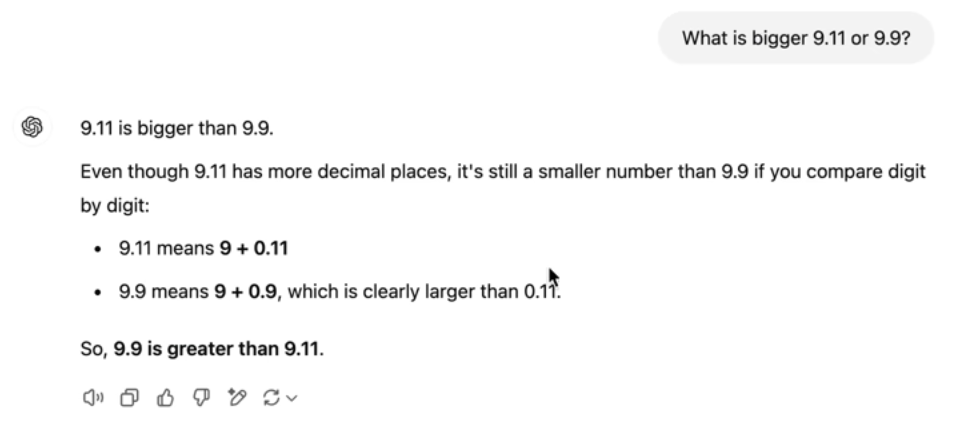
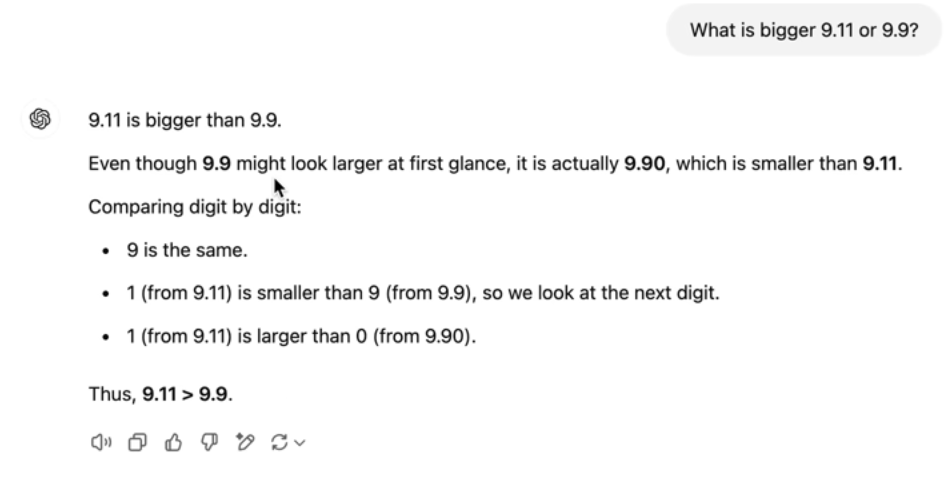
